# TODO
* Change into snake case.

# Style

# Importing and functions

## Resetting and running command line things

In [1]:
%reset -f

!pip install pandas

## Importing (standard) modules

In [2]:
# Data/vector handeling and extra math
import numpy as np
import pandas as pd
import math

# Optimisation
import scipy
from scipy import optimize
import sklearn.metrics as metrics

#Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Error handeling
import warnings

# Time
import time
import datetime

# System/file interaction
import os
import pickle# https://www.pythoncentral.io/how-to-pickle-unpickle-tutorial/
import shelve# https://stackoverflow.com/questions/2960864/how-to-save-all-the-variables-in-the-current-python-session

## Importing from file

In [3]:
from helpers import *
from exampleHelpers import *

## Defining (lambda) functions

In [4]:
exampleRealFunction = lambda x: np.exp(x)/10 + x**2 + np.sqrt(x)# https://realpython.com/python-lambda/

def thirdOrderPolynomial(x, a: float, b: float, c=2, d=1):
    """
    A third order polynomial function.
    
    This is the function that is going to be fitted with the data.
    """
    first_part = a + b*x
    second_part = c*x**2 + d*x**3
    return first_part + second_part

# Example of data importing, fitting, filtering and plotting

## (Online) data importing, subplots and figure display/saving

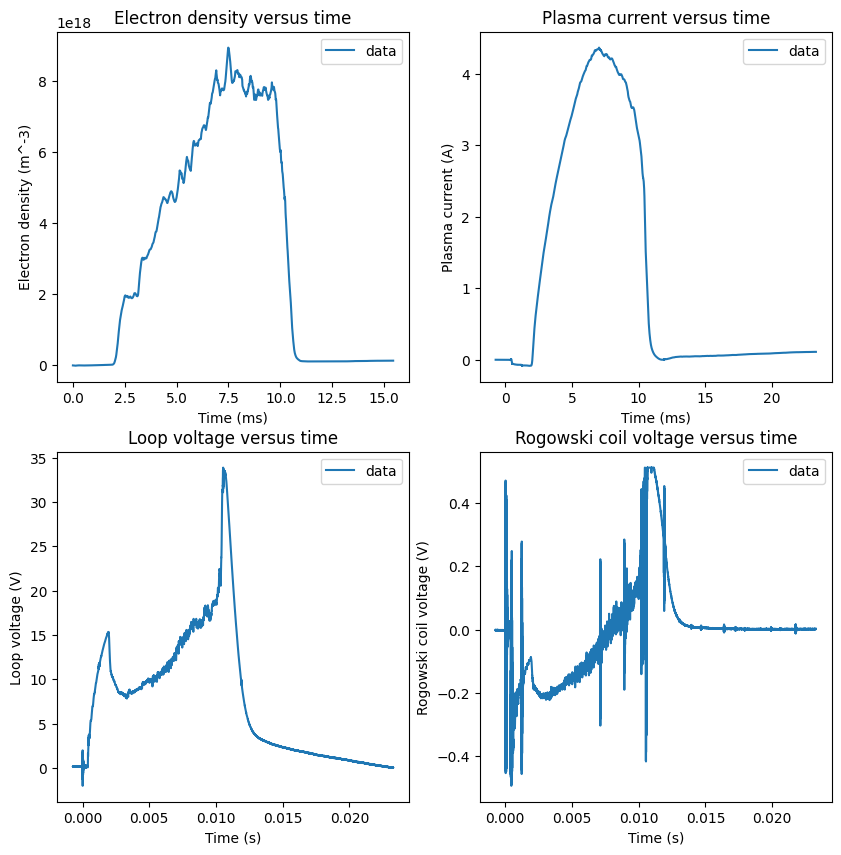

In [5]:
## Importing data
shot_no = 41299

"""import requests
t_CD = requests.get('http://golem.fjfi.cvut.cz/shots/'+str(shot_no)+'/Production/Parameters/Tcd')# Time curren drive
t_CD = float(t_CD.content) * 1e-6  # from us to s"""

### From file via numpy.
"""
data = np.genfromtxt(filename, skip_header=2, delimiter =  ",")
x = data[:,0]
y = data[:,1]#"""

### From file via pandas
"""
data = pd.read_csv("Spectrum.txt", delimiter="\t")
print(data.describe(), data.columns)
x = data[data.columns[0]]
y = data["Intensity"]#"""

### From internet pandas
ne_lav = pd.read_csv('http://golem.fjfi.cvut.cz/shots/'+str(shot_no)+'/Diagnostics/Interferometry/LukLob/ne_lav.csv', header=None)
Ip = pd.read_csv('http://golem.fjfi.cvut.cz/shots/'+str(shot_no)+'/Diagnostics/BasicDiagnostics/Basic/Results/Ip.csv', header=None)
U_Loop = pd.read_csv('http://golem.fjfi.cvut.cz/shots/'+str(shot_no)+'/Diagnostics/BasicDiagnostics/DetectPlasma/U_Loop.csv', header=None)
U_RogCoil = pd.read_csv('http://golem.fjfi.cvut.cz/shots/'+str(shot_no)+'/Diagnostics/BasicDiagnostics/DetectPlasma/U_RogCoil.csv', header=None)

## Plotting data
fig, [[ax1, ax2],[ax3, ax4]] = plt.subplots(2, 2, figsize = (10,10))# Make an plot with multiple subfigures

ax1.plot(ne_lav[0], ne_lav[1], label="data")
ax1.set_xlabel("Time (ms)")
ax1.set_ylabel("Electron density (m^-3)")
ax1.set_title("Electron density versus time")
ax1.legend()

ax2.plot(Ip[0], Ip[1], label="data")
ax2.set_xlabel("Time (ms)")
ax2.set_ylabel("Plasma current (A)")
ax2.set_title("Plasma current versus time")
ax2.legend()

ax3.plot(U_Loop[0], U_Loop[1], label="data")
ax3.set_xlabel("Time (s)")
ax3.set_ylabel("Loop voltage (V)")
ax3.set_title("Loop voltage versus time")
ax3.legend()

ax4.plot(U_RogCoil[0], U_RogCoil[1], label="data")
ax4.set_xlabel("Time (s)")
ax4.set_ylabel("Rogowski coil voltage (V)")
ax4.set_title("Rogowski coil voltage versus time")
ax4.legend()

plt.show()

## Saving and deleting

In [6]:
## Figure
fig.savefig('ExampleSubfigures.pdf', dpi=1200)# resolution = figsize*dpi#, format='eps'

## Pickle a single variable
if not os.path.isdir("temp"):
    os.makedirs("temp")

with open("temp/pickle_file.pickle", "wb") as file:
    pickle.dump(Ip, file)

with open("temp/pickle_file.pickle", "rb") as file:
    Ip = pickle.load(file)
#print(IpFromPickle)

## Shelving
myShelve = shelve.open("temp/shelve_file", "n")
for key in dir():
    try:
        myShelve[key] = globals()[key]
    except:
        # Doesn't save everything, but most variables are saved.
        print('ERROR shelving: {0}'.format(key))
myShelve.close()

my_shelf = shelve.open("temp/shelve_file")
for key in my_shelf:
    try:
        globals()[key]=my_shelf[key]
    except:
        print('(Limited) ERROR unshelving: {0}'.format(key))
my_shelf.close()

## Deleting files
os.remove('ExampleSubfigures.pdf')
os.remove("temp/pickle_file.pickle")
os.remove("temp/shelve_file.bak")
os.remove("temp/shelve_file.dat")
os.remove("temp/shelve_file.dir")
os.rmdir("temp")

ERROR shelving: __builtin__
ERROR shelving: __builtins__
ERROR shelving: datetime
ERROR shelving: exampleRealFunction
ERROR shelving: exit
ERROR shelving: file
ERROR shelving: get_ipython
ERROR shelving: math
ERROR shelving: metrics
ERROR shelving: np
ERROR shelving: open
ERROR shelving: optimize
ERROR shelving: os
ERROR shelving: pd
ERROR shelving: pickle
ERROR shelving: plt
ERROR shelving: quit
ERROR shelving: scipy
ERROR shelving: shelve
ERROR shelving: sns
ERROR shelving: time
ERROR shelving: warnings


## Data importing, fitting/filtering, scatter/line plot, finding a specific data point/index

Theoretical minimum MAPE: 10.005705534447348
Fit parameters: [-0.88563445  3.45822926 -0.62648236  0.32870123] with standard deviation [2.28178547 2.69036917 0.96114535 0.10611787]
RMSE =  2.23024064945974 , MAPE = 10.07184002881937 , MAE = 1.5894434373947266 , MSE = 4.973973354502603 , R2 = 0.9619661949310194


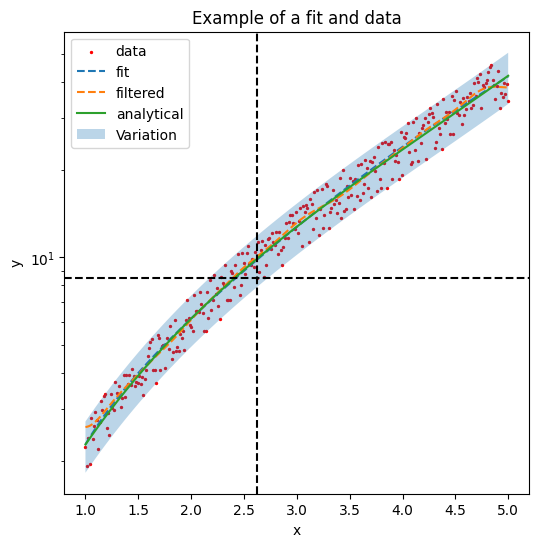

In [7]:

## Generating/getting data
### From function
amountOfDatapoints = 300
variation = 0.2

x = np.linspace(1, 5, num=amountOfDatapoints)
y = exampleRealFunction(x) * ((2 * np.random.rand(amountOfDatapoints) - 1) * variation + 1)# Add random variation to y data
print("Theoretical minimum MAPE:", 100*metrics.mean_absolute_percentage_error(y, exampleRealFunction(x)))

## Fitting data
startingParameters = [-10, 15, -5, 1]# Optional starting values of the parameters
popt, pcov = optimize.curve_fit(thirdOrderPolynomial, x, y, startingParameters)# Make the fit.

fit = thirdOrderPolynomial(x, *popt)# Get the results of the fit.
print("Fit parameters:", popt, "with standard deviation", np.sqrt(np.diag(pcov)))
print("RMSE = ", metrics.mean_squared_error(y, fit, squared=False), ", MAPE =", 100*metrics.mean_absolute_percentage_error(y, fit), ", MAE =", metrics.mean_absolute_error(y, fit), ", MSE =", metrics.mean_squared_error(y, fit), ", R2 =", metrics.r2_score(y, fit))#https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

## Filtering data
y_filter = scipy.ndimage.gaussian_filter(y, 10)# Apply a Gaussian filter (like time averaging) to smooth the curve.

x_interpolation = np.linspace(1, 5, num=5*amountOfDatapoints)
y_interpolation = np.interp(x_interpolation, x, y_filter)

## Get the index of where y=10
y_goal = 10
index = (np.abs(y_filter - y_goal)).argmin()

## Ploting data
fig, ax = plt.subplots(1, 1, figsize = (6,6))# Make a plot.
ax.scatter(x, y, label="data", s=2, marker="o", color='r')
ax.plot(x, fit, linestyle="--", label="fit")
ax.plot(x, y_filter, linestyle="--", label="filtered")
ax.plot(x, exampleRealFunction(x), label="analytical")
ax.fill_between(x, exampleRealFunction(x)*(1+variation), exampleRealFunction(x)*(1-variation), alpha=0.3, label="Variation")
ax.axvline(x[index], color="k", linestyle="--")
ax.axhline(y[index], color="k", linestyle="--")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_yscale('log')
ax.set_title("Example of a fit and data")
ax.legend()
plt.show()

## Example polynomial fitting and random data generation

Selected order: order 20 of 20 , MAPE: 11.793964442235609 , minimum MAPE: 11.793964442235609
Coefficients: [-2.53364174e+01  5.17046863e+02 -3.89137508e+03  1.48258909e+04
 -3.28412159e+04  4.65323514e+04 -4.49368969e+04  3.08640750e+04
 -1.55106793e+04  5.80612906e+03 -1.63326596e+03  3.45039821e+02
 -5.40035109e+01  6.02797592e+00 -4.30668847e-01  1.11727791e-02
  1.32233653e-03 -1.79276517e-04  1.03654662e-05 -3.14610234e-07
  4.08353135e-09]


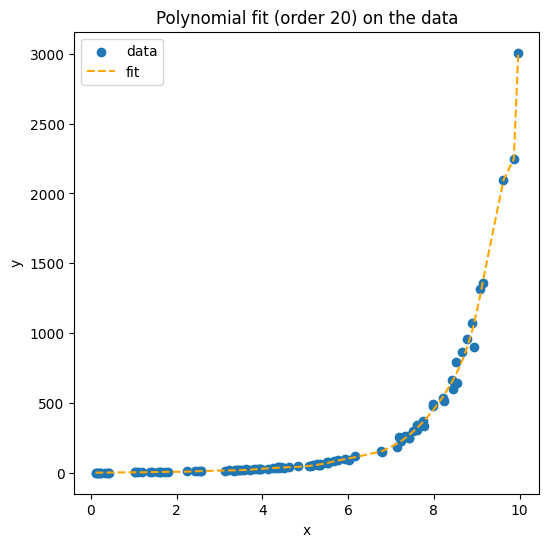

Selected order: order 4 of 4 , MAPE: 46.06301340184827 , minimum MAPE: 46.06301340184827
Coefficients: [-0.17696299  0.66363052  0.09311559 -0.04974121 -0.00325539]


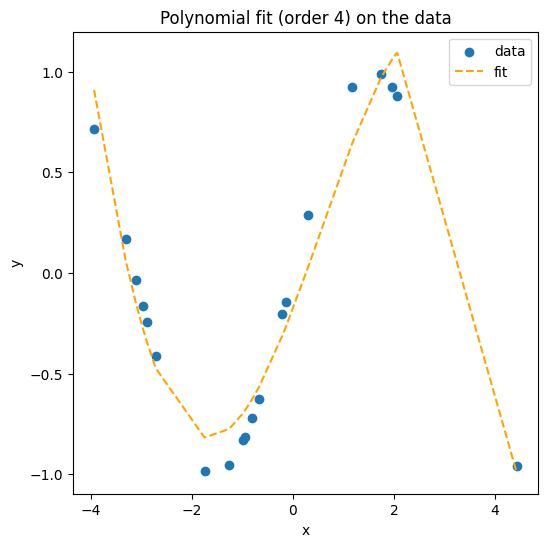

In [8]:
variation = 0.2

x = np.sort((10 * np.random.rand(100)))# 100 random points between 0 and 10
#x = np.linspace(1, 10, num=amountOfDatapoints)
y = exampleRealFunction(x) * ((2*np.random.rand(len(x))*variation + 1))# Add random variation to y data guaranteed to be in a certain range.

coefficients, MAPE = makePolynomialFit(x, y, True)

x = np.sort(np.random.normal(loc=0, scale=2, size=20))#20 random points of a Gaussian distribution with a mean of 0 and std of 2.
y = np.sin(x)
coefficients, MAPE = makePolynomialFit(x, y, True)

## Heatmap and contour plot example

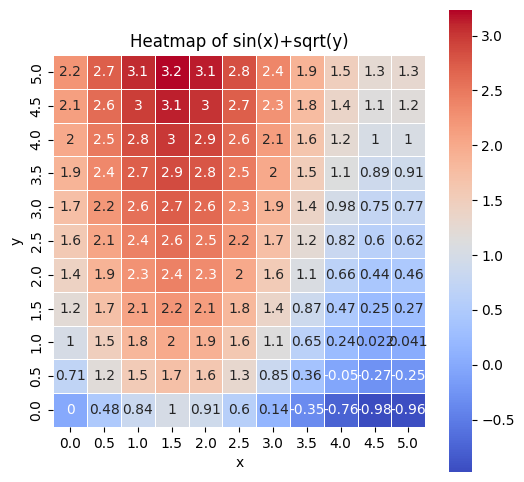

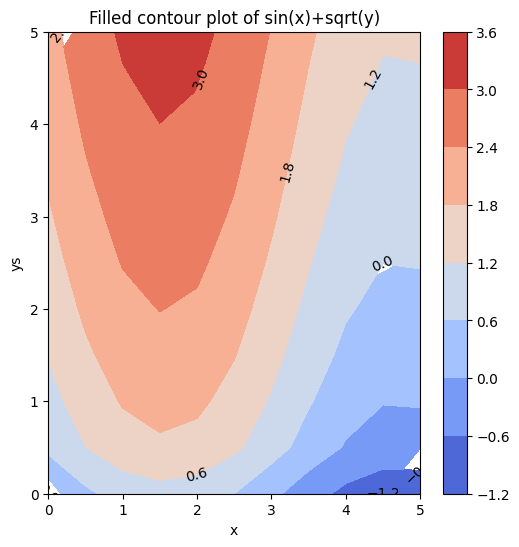

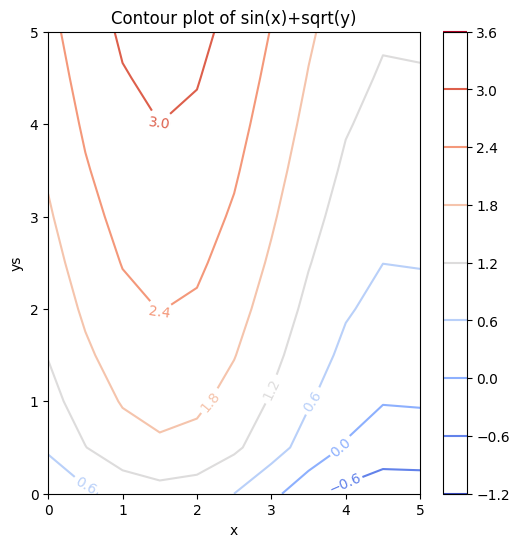

In [9]:
x = []
y = []
z = []

for i in np.linspace(0, 5, num=11):
    for j in np.linspace(0, 5, num=11):
        x.append(i)
        y.append(j)
        z.append(np.sin(i)+np.sqrt(j))

## Plotting
xGrid, yGrid, zGrid, pdDataframe = transformToGrid(x, y, z, xName="x", yName="y", zName="sin(x)+sqrt(y)")
fig, ax = plt.subplots(1, 1, figsize = (6, 6))
sns.heatmap(pdDataframe, ax=ax, cmap="coolwarm", linewidths=.5, annot=True, square=True)
ax.invert_yaxis()
#ax.xaxis.tick_top()
ax.set_title("Heatmap of sin(x)+sqrt(y)")
plt.show()

xGrid, yGrid, zGrid, pdDataframe = transformToGrid(x, y, z, xName="x", yName="y", zName="sin(x)+sqrt(y)")
fig, ax = plt.subplots(1, 1, figsize = (6, 6))
CS = ax.contourf(xGrid, yGrid, zGrid, cmap="coolwarm")#, levels=13)
ax.clabel(CS, fontsize=10, colors=['black' for l in CS.levels])
ax.set_title("Filled contour plot of sin(x)+sqrt(y)")
ax.set_xlabel("x")
ax.set_ylabel("ys")
fig.colorbar(CS)
plt.show()

xGrid, yGrid, zGrid, pdDataframe = transformToGrid(x, y, z, xName="x", yName="y", zName="sin(x)+sqrt(y)")
fig, ax = plt.subplots(1, 1, figsize = (6, 6))
CS = ax.contour(xGrid, yGrid, zGrid, cmap="coolwarm")#, levels=13)
ax.clabel(CS, fontsize=10)
ax.set_title("Contour plot of sin(x)+sqrt(y)")
ax.set_xlabel("x")
ax.set_ylabel("ys")
fig.colorbar(CS)
plt.show()

# Machine learning

## Neural Network

In [10]:
import torch
torch.cuda.is_available()# Jammer ;(

#TODO

False

## Guassian procces

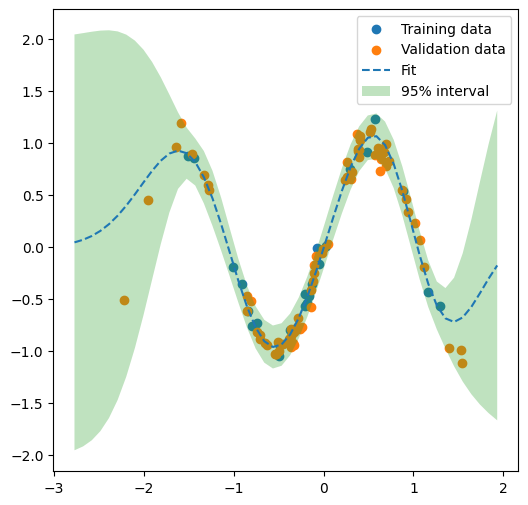

Training error: {'RMSE': 0.07646423654947372, 'MAPE': 144.2060169320146, 'MAE': 0.060565967651680985, 'MSE': 0.005846779471093872, 'R2': 0.9856402449511851}
Validation error: {'RMSE': 0.15908850114820738, 'MAPE': 23.358325042014453, 'MAE': 0.09881213384040517, 'MSE': 0.02530915119758318, 'R2': 0.9598838065066516}


In [11]:
from sklearn.gaussian_process import GaussianProcessRegressor# https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessRegressor.html
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, Matern, RationalQuadratic, ExpSineSquared, PairwiseKernel
from sklearn.model_selection import train_test_split

N = 100
noise = 0.1
f0 = lambda x: np.sin(3*x)
x = np.random.normal(loc=0, scale=0.8, size=N)
y = f0(x) + noise*np.random.normal(loc=0,scale=0.9,size=x.shape)


ker = RBF(length_scale=1) + WhiteKernel(noise_level=1.0)#, Matern, RationalQuadratic, ExpSineSquared
regressor, training_error, validation_error = make_Gaussian_proccess_model(x, y, kernel=ker, validation_fraction=0.75, make_plot=True)

#ker = ExpSineSquared(length_scale=1) + WhiteKernel(noise_level=1.0)
#regressor, training_error, validation_error = make_Gaussian_proccess_model(x, y, kernel=ker, validation_fraction=0.75, make_plot=True)

#ker = ExpSineSquared() + RBF() + WhiteKernel()
#regressor, training_error, validation_error = make_Gaussian_proccess_model(x, y, kernel=ker, validation_fraction=0.75, make_plot=True)


# Performance and updates

## Progress bar
(Only for Jupyter notebook)

In [12]:
startTime = time.time()

for i in range(0,1001,50):
    random_function(i/200)
    update_progress(i/1000, bar_length=50, start_time=startTime, message="This is an message")

endTime = time.time()
print("Simulation took:", endTime-startTime,"seconds.")

Progress: [##################################################] 100.0% | 1.14 %/min | Time remaining 0.0 min | This is an message                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
Simulation took: 52.50758337974548 seconds.


In [13]:
for x in range (0,5):  
    b = "Loading" + "." * x
    print (b, end="\r")
    time.sleep(1)

In [14]:
%timeit random_function()

The slowest run took 13.79 times longer than the fastest. This could mean that an intermediate result is being cached.
2.01 s ± 968 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [15]:
%prun random_function(s = math.floor(np.pi*10**5))

         314167 function calls in 2.784 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    2.657    2.657    2.657    2.657 {built-in method time.sleep}
   314159    0.072    0.000    0.072    0.000 {method 'rand' of 'numpy.random.mtrand.RandomState' objects}
        1    0.055    0.055    2.784    2.784 exampleHelpers.py:30(random_function)
        1    0.000    0.000    2.784    2.784 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'normal' of 'numpy.random.mtrand.RandomState' objects}
        1    0.000    0.000    2.784    2.784 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
        1    0.000    0.000    0.000    0.000 {built-in method builtins.max}
        1    0.000    0.000    0.000    0.000 {built-in method math.floor}